In [1]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [2]:
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 69.7 MB/s eta 0:00:00


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import mne

In [5]:
from sklearn.decomposition import PCA

In [7]:
healthyfiles = os.listdir('/content/drive/MyDrive/Depression Research/Healthy')
len(healthyfiles)

14

In [8]:
Controlledfiles = os.listdir('/content/drive/MyDrive/Depression Research/Controlled')
len(Controlledfiles)

80

In [9]:
NonDepressedfiles = os.listdir('/content/drive/MyDrive/Depression Research/Non Depressed')
len(NonDepressedfiles)

56

In [10]:
X = np.zeros((1, 250, 8))
Y = []

In [11]:
for i in range(0,12):
  for f in healthyfiles:
    path = os.path.join('/content/drive/MyDrive/Depression Research/Healthy',f)
    raw = mne.io.read_raw_edf(path)
    raw.resample(250)
    df = raw.to_data_frame()
    df = df[['Fp2','F8','O2','Fp1','F7','O1','F4','C4','P4','F3','C3','P3','Fz','Cz','Pz']]
  
    print(f)
    df_stats = df.describe()
    df_stats = df_stats.transpose()

    def norm(X):
      return X-df_stats['mean']/df_stats['std']

    df = norm(df)
    df = df.iloc[:250]
    Xdash = df.values
    index = np.where(np.isnan(Xdash).any(axis=1))[0]
    Xdash = np.delete(Xdash,index,axis=0)
    if np.size(Xdash) != 0:
      pca = PCA(n_components=8)
      pca.fit(Xdash)
      Xdash = pca.transform(Xdash)
      Xdash = Xdash.reshape((1,250,8))
      X = np.concatenate((X,Xdash),axis=0)
      Y.append(0)

Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Healthy/h01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
h01.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Healthy/h02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
h02.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Healthy/h04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
h04.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Healthy/h03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
h03.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Healthy/h05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
h05.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Health

In [12]:
X.shape

(169, 250, 8)

In [13]:
len(Y)

168

In [14]:
X = X[1:]

In [15]:
X.shape

(168, 250, 8)

In [16]:
for i in range(0,2):
  for f in Controlledfiles:
    path = os.path.join('/content/drive/MyDrive/Depression Research/Controlled',f)
    df = pd.read_csv(path)
    ch_names = df.columns.tolist()
    ch_types = ['eeg'] * len(ch_names)
    sfreq = 256  
    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)
    raw = mne.io.RawArray(df.values.T, info)
    raw_resampled = raw.resample(250)
    df = raw_resampled.to_data_frame()
    df = df[['FP2','F8','O2','FP1','F7','O1','F4','C4','P4','F3','C3','P3','FZ','CZ','PZ']]
    #print(f)
    #df = df.drop(['Unnamed: 0'],axis=1)
    df_stats = df.describe()
    df_stats = df_stats.transpose()
    def norm(X):
      return X-df_stats['mean']/df_stats['std']

    df = norm(df)
    df = df.iloc[:250]
    Xdash = df.values
    index = np.where(np.isnan(Xdash).any(axis=1))[0]
    Xdash = np.delete(Xdash,index,axis=0)
    if np.size(Xdash) != 0:
      pca = PCA(n_components=8)
      pca.fit(Xdash)
      Xdash = pca.transform(Xdash)
      Xdash = Xdash.reshape((1,250,8))
      X = np.concatenate((X,Xdash),axis=0)
      Y.append(0)

Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.


In [17]:
X.shape

(326, 250, 8)

In [18]:
len(Y)

326

In [19]:
for i in range(0,3):
  for f in NonDepressedfiles:
    path = os.path.join('/content/drive/MyDrive/Depression Research/Non Depressed',f)
    raw = mne.io.read_raw_edf(path)
    raw.resample(250)
    df = raw.to_data_frame()
    df = df[['EEG Fp2-LE','EEG F8-LE','EEG O2-LE','EEG Fp1-LE','EEG F7-LE','EEG O1-LE','EEG F4-LE','EEG C4-LE','EEG P4-LE','EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE','EEG Fz-LE','EEG Cz-LE', 'EEG Pz-LE']]
    
    print(f)
    df_stats = df.describe()
    df_stats = df_stats.transpose()

    def norm(X):
      return X-df_stats['mean']/df_stats['std']

    df = norm(df)
    df = df.iloc[:250]
    Xdash = df.values
    index = np.where(np.isnan(Xdash).any(axis=1))[0]
    Xdash = np.delete(Xdash,index,axis=0)
    if np.size(Xdash) != 0:
      pca = PCA(n_components=8)
      pca.fit(Xdash)
      Xdash = pca.transform(Xdash)
      Xdash = Xdash.reshape((1,250,8))
      X = np.concatenate((X,Xdash),axis=0)
      Y.append(0)

Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Non Depressed/H S10 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
H S10 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Non Depressed/H S4 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
H S4 EC.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Non Depressed/H S30 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
H S30 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Non Depressed/H S16 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
H S16 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Non Depressed/H S23 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
H S23 EC.edf
Ex

In [20]:
X.shape

(494, 250, 8)

In [21]:
len(Y)

494

In [22]:
Alcoholfiles = os.listdir('/content/drive/MyDrive/Depression Research/Alcoholic')
len(Alcoholfiles)

80

In [23]:
for i in range(0,6):
  for f in Alcoholfiles:
    path = os.path.join('/content/drive/MyDrive/Depression Research/Alcoholic',f)
    df = pd.read_csv(path)
    ch_names = df.columns.tolist()
    ch_types = ['eeg'] * len(ch_names)
    sfreq = 256  
    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sfreq)
    raw = mne.io.RawArray(df.values.T, info)
    raw_resampled = raw.resample(250)
    df = raw_resampled.to_data_frame()
    df = df[['FP2','F8','O2','FP1','F7','O1','F4','C4','P4','F3','C3','P3','FZ','CZ','PZ']]
    #print(f)
    #df = df.drop(['Unnamed: 0'],axis=1)
    df_stats = df.describe()
    df_stats = df_stats.transpose()

    def norm(X):
      return X-df_stats['mean']/df_stats['std']

    df = norm(df)
    df = df.iloc[:250]
    Xdash = df.values
    index = np.where(np.isnan(Xdash).any(axis=1))[0]
    Xdash = np.delete(Xdash,index,axis=0)
    if np.size(Xdash) != 0:
      pca = PCA(n_components=8)
      pca.fit(Xdash)
      Xdash = pca.transform(Xdash)
      Xdash = Xdash.reshape((1,250,8))
      X = np.concatenate((X,Xdash),axis=0)
      Y.append(1)

Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Creating RawArray with float64 data, n_channels=65, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.


In [24]:
X.shape

(944, 250, 8)

In [25]:
len(Y)

944

In [26]:
Schizophreniafiles = os.listdir('/content/drive/MyDrive/Depression Research/Schizophrenic')
len(Schizophreniafiles)

14

In [27]:
for i in range(0,36):
  for f in Schizophreniafiles:
    path = os.path.join('/content/drive/MyDrive/Depression Research/Schizophrenic',f)
    raw = mne.io.read_raw_edf(path)
    raw.resample(250)
    df = raw.to_data_frame()
    df = df[['Fp2','F8','O2','Fp1','F7','O1','F4','C4','P4','F3','C3','P3','Fz','Cz','Pz']]
    
    print(f)
    df_stats = df.describe()
    df_stats = df_stats.transpose()

    def norm(X):
      return X-df_stats['mean']/df_stats['std']

    df = norm(df)
    df = df.iloc[:250]
    Xdash = df.values
    index = np.where(np.isnan(Xdash).any(axis=1))[0]
    Xdash = np.delete(Xdash,index,axis=0)
    if np.size(Xdash) != 0:
      pca = PCA(n_components=8)
      pca.fit(Xdash)
      Xdash = pca.transform(Xdash)
      Xdash = Xdash.reshape((1,250,8))
      X = np.concatenate((X,Xdash),axis=0)
      Y.append(2)

Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Schizophrenic/s01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
s01.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Schizophrenic/s02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
s02.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Schizophrenic/s03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
s03.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Schizophrenic/s04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
s04.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Schizophrenic/s05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
s05.edf
Extracting EDF parameters from /content/drive/MyDr

In [28]:
X.shape

(1448, 250, 8)

In [29]:
len(Y)

1448

In [30]:
Depressedfiles = os.listdir('/content/drive/MyDrive/Depression Research/Depressed')
len(Depressedfiles)

62

In [31]:
for i in range(0,8):
  for f in Depressedfiles:
    path = os.path.join('/content/drive/MyDrive/Depression Research/Depressed',f)
    raw = mne.io.read_raw_edf(path)
    raw.resample(250)
    df = raw.to_data_frame()
    df = df[['EEG Fp2-LE','EEG F8-LE','EEG O2-LE','EEG Fp1-LE','EEG F7-LE','EEG O1-LE','EEG F4-LE','EEG C4-LE','EEG P4-LE','EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE','EEG Fz-LE','EEG Cz-LE', 'EEG Pz-LE']]
    
    print(f)
    df_stats = df.describe()
    df_stats = df_stats.transpose()

    def norm(X):
      return X-df_stats['mean']/df_stats['std']

    df = norm(df)
    df = df.iloc[:250]
    Xdash = df.values
    index = np.where(np.isnan(Xdash).any(axis=1))[0]
    Xdash = np.delete(Xdash,index,axis=0)
    if np.size(Xdash) != 0:
      pca = PCA(n_components=8)
      pca.fit(Xdash)
      Xdash = pca.transform(Xdash)
      Xdash = Xdash.reshape((1,250,8))
      X = np.concatenate((X,Xdash),axis=0)
      Y.append(3)

Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Depressed/MDD S30 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
MDD S30 EC.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Depressed/MDD S23 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
MDD S23 EC.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Depressed/MDD S2 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
MDD S2 EO.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Depressed/MDD S26 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
MDD S26 EC.edf
Extracting EDF parameters from /content/drive/MyDrive/Depression Research/Depressed/MDD S27 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
MDD S27 EO.edf
Ex

In [32]:
X.shape

(1944, 250, 8)

In [33]:
len(Y)

1944

In [34]:
Y = np.array(Y)

In [35]:
Y.shape

(1944,)

In [36]:
Y

array([0, 0, 0, ..., 3, 3, 3])

# **NOTE**
# **Healthy/Controlled/Non Depressed = 0**
# **Alcoholic = 1**
# **Schizophrenic = 2**
# **Depressed = 3**

In [37]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y)
Y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [38]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=5000)

In [39]:
X_train.shape

(1749, 250, 8)

In [40]:
Y_train.shape

(1749, 4)

In [41]:
X_test.shape

(195, 250, 8)

In [42]:
Y_test.shape

(195, 4)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input,LeakyReLU,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam,SGD

In [44]:
model = Sequential()
model.add(Input(shape=(250,8)))
model.add(Flatten())
model.add(Dense(80,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(80,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(80,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(80,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(80,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(80,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(80,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(80,activation='tanh'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#END
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2000)              0         
                                                                 
 dense (Dense)               (None, 80)                160080    
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 batch_normalization (BatchN  (None, 80)               320       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                        

In [46]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_loss',patience=10)

In [47]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=500,callbacks=[earlystop],batch_size=100)

Epoch 1/500
18/18 [==============================] - 13s 33ms/step - loss: 1.6088 - accuracy: 0.3333 - val_loss: 1.2125 - val_accuracy: 0.4564
Epoch 2/500
18/18 [==============================] - 0s 14ms/step - loss: 1.3034 - accuracy: 0.4248 - val_loss: 1.0375 - val_accuracy: 0.5641
Epoch 3/500
18/18 [==============================] - 0s 14ms/step - loss: 1.1626 - accuracy: 0.4723 - val_loss: 0.9502 - val_accuracy: 0.6462
Epoch 4/500
18/18 [==============================] - 0s 13ms/step - loss: 1.1026 - accuracy: 0.4974 - val_loss: 0.8540 - val_accuracy: 0.6256
Epoch 5/500
18/18 [==============================] - 0s 14ms/step - loss: 1.0177 - accuracy: 0.5500 - val_loss: 0.7933 - val_accuracy: 0.6872
Epoch 6/500
18/18 [==============================] - 0s 20ms/step - loss: 0.9485 - accuracy: 0.5655 - val_loss: 0.7346 - val_accuracy: 0.6923
Epoch 7/500
18/18 [==============================] - 0s 20ms/step - loss: 0.9064 - accuracy: 0.5963 - val_loss: 0.6786 - val_accuracy: 0.7333
Epoch

<Axes: >

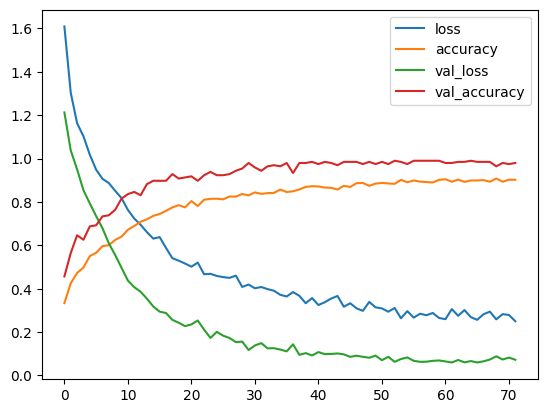

In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [49]:
Y_pred = np.round(model.predict(X_test))

7/7 [==============================] - 0s 4ms/step


In [50]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        41
           1       0.94      1.00      0.97        50
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        59

   micro avg       0.98      0.98      0.98       195
   macro avg       0.99      0.98      0.98       195
weighted avg       0.99      0.98      0.98       195
 samples avg       0.98      0.98      0.98       195



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
Y_pred1 = np.round(model.predict(X))

61/61 [==============================] - 0s 4ms/step


In [52]:
print(classification_report(Y,Y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93       494
           1       0.89      1.00      0.94       450
           2       1.00      1.00      1.00       504
           3       1.00      1.00      1.00       496

   micro avg       0.97      0.97      0.97      1944
   macro avg       0.97      0.97      0.97      1944
weighted avg       0.97      0.97      0.97      1944
 samples avg       0.97      0.97      0.97      1944



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
model.save('/content/drive/MyDrive/Depression Research/Complete ANN7.h5')